##  Credit Card Data Analysis

##### IMPORTING

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# Importing data
df = pd.read_csv('train_s3TEQDk.csv')


In [ ]:
#first 10 instances of the data
df.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


##### MISSING VALUE TREATMENT

In [ ]:
(df.isnull().sum()/df.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [ ]:
df['Credit_Product'].fillna(df['Credit_Product'].mode()[0], inplace = True)

In [ ]:
(df.isnull().sum()/df.shape[0])*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

### TYPECASTING

In [ ]:
df.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [ ]:
# Finding out the integers variables
df.dtypes[df.dtypes == 'int64']

Age                    int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

In [ ]:
df['Avg_Account_Balance'] = df['Avg_Account_Balance'].astype('float64')
df['Is_Lead'] = df['Is_Lead'].astype('category')

In [ ]:
# Finding out the object variables
df.dtypes[df.dtypes == 'object']

ID                object
Gender            object
Region_Code       object
Occupation        object
Channel_Code      object
Credit_Product    object
Is_Active         object
dtype: object

In [ ]:
df['Gender'] = df['Gender'].astype('category')
df['Region_Code'] = df['Region_Code'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Channel_Code'] = df['Channel_Code'].astype('category')
df['Credit_Product'] = df['Credit_Product'].astype('category')
df['Is_Active'] = df['Is_Active'].astype('category')

In [ ]:
df.dtypes

ID                       object
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance     float64
Is_Active              category
Is_Lead                category
dtype: object

### UNIVARIATE ANALYSIS

#### 1. NUMERICAL VARIABLES

In [ ]:
# Numerical datatypes
df.select_dtypes(include=['int64','float64']).dtypes

Age                      int64
Vintage                  int64
Avg_Account_Balance    float64
dtype: object

In [ ]:
num = ['Age','Vintage','Avg_Account_Balance']

In [ ]:
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

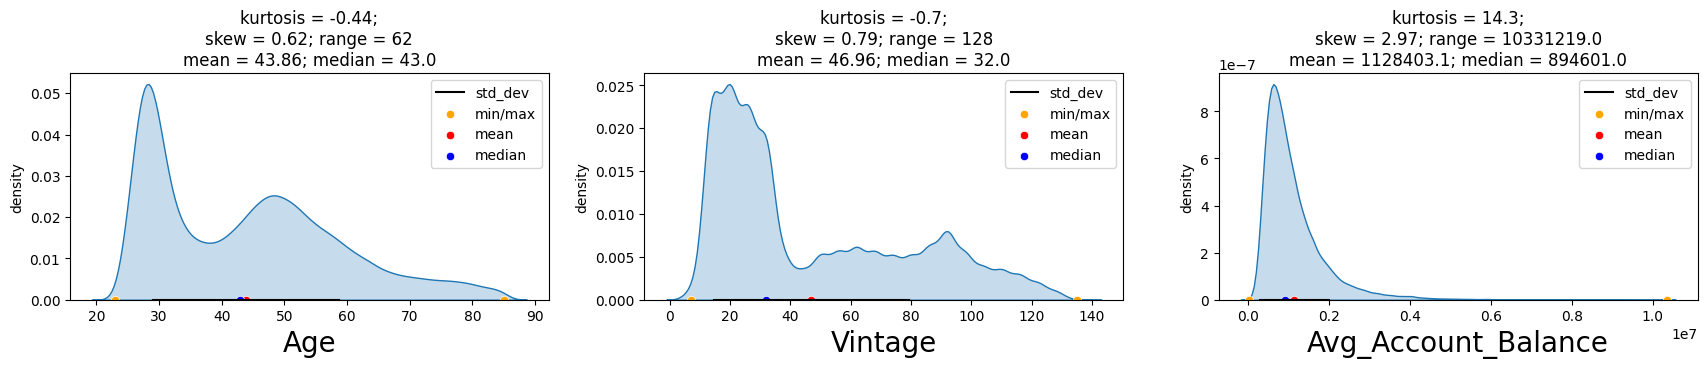

In [ ]:
UVA_KDE(df,num)

In [ ]:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))



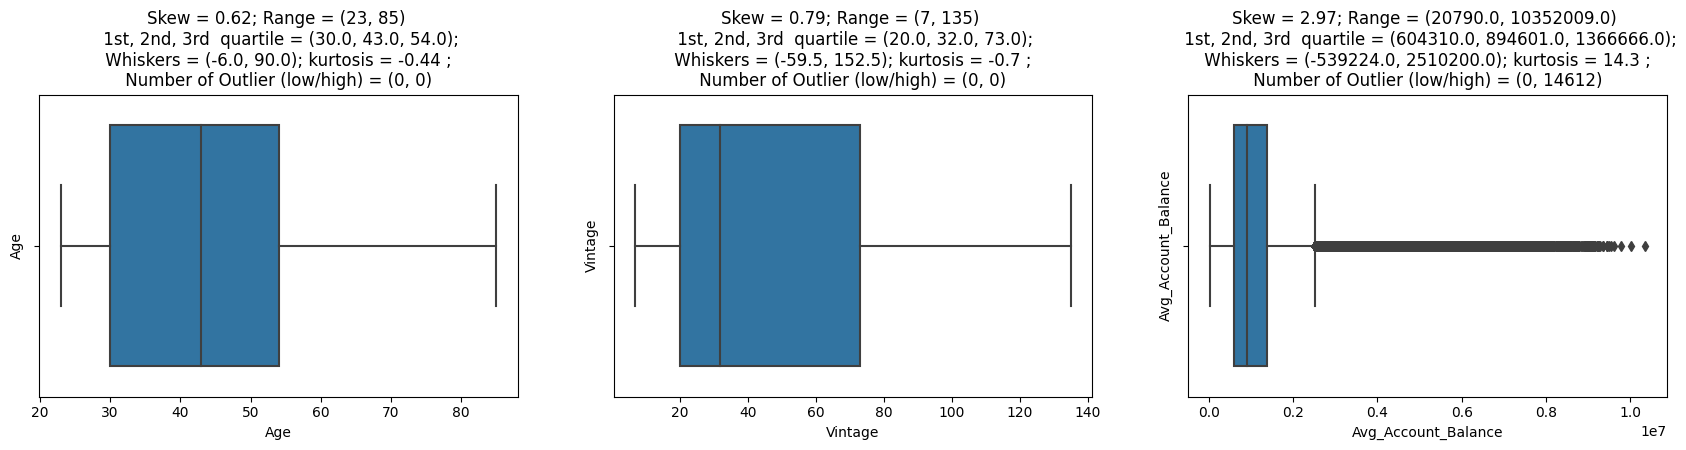

In [ ]:
UVA_boxplot(df,num)

#### 2. CATEGORICAL VARIABLES

In [ ]:
# Categorical datatypes
df.select_dtypes(include=['category']).dtypes

Gender            category
Region_Code       category
Occupation        category
Channel_Code      category
Credit_Product    category
Is_Active         category
Is_Lead           category
dtype: object

In [ ]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (8*size,6), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.tight_layout()

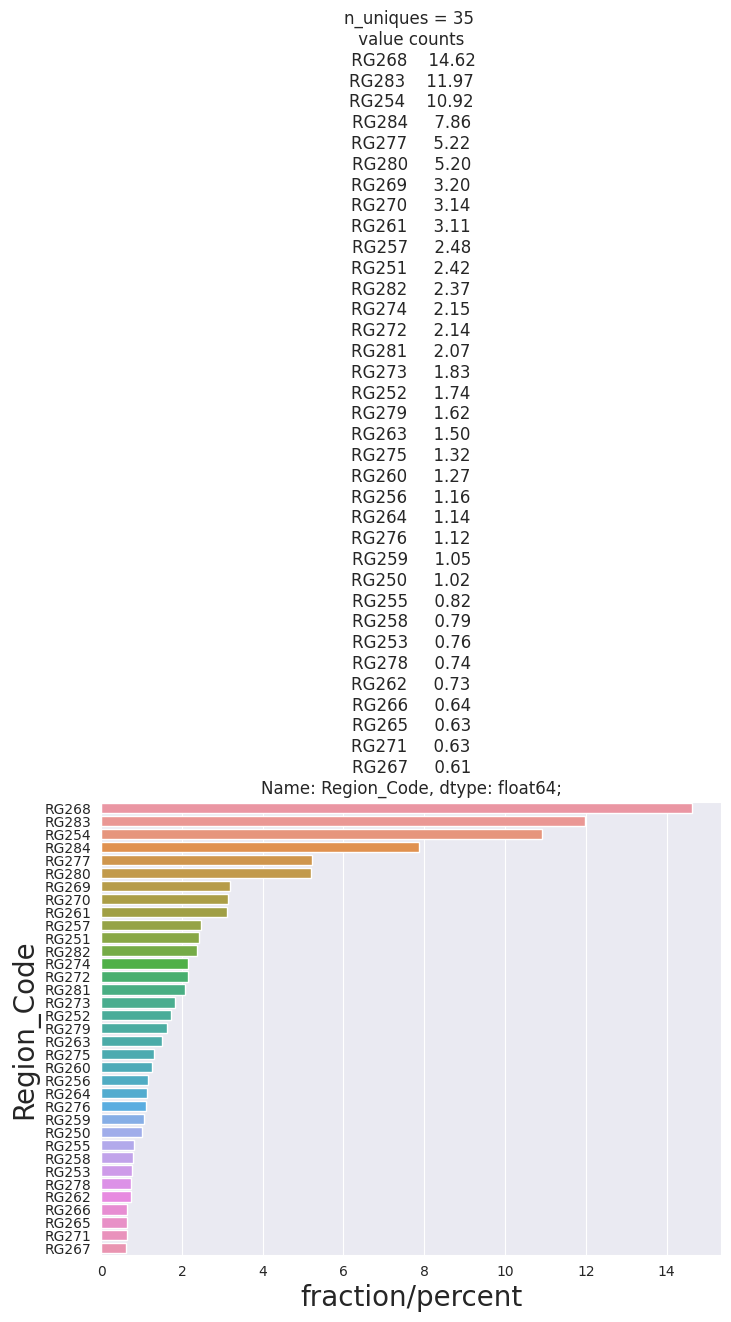

In [ ]:
UVA_category(df, ['Region_Code'])

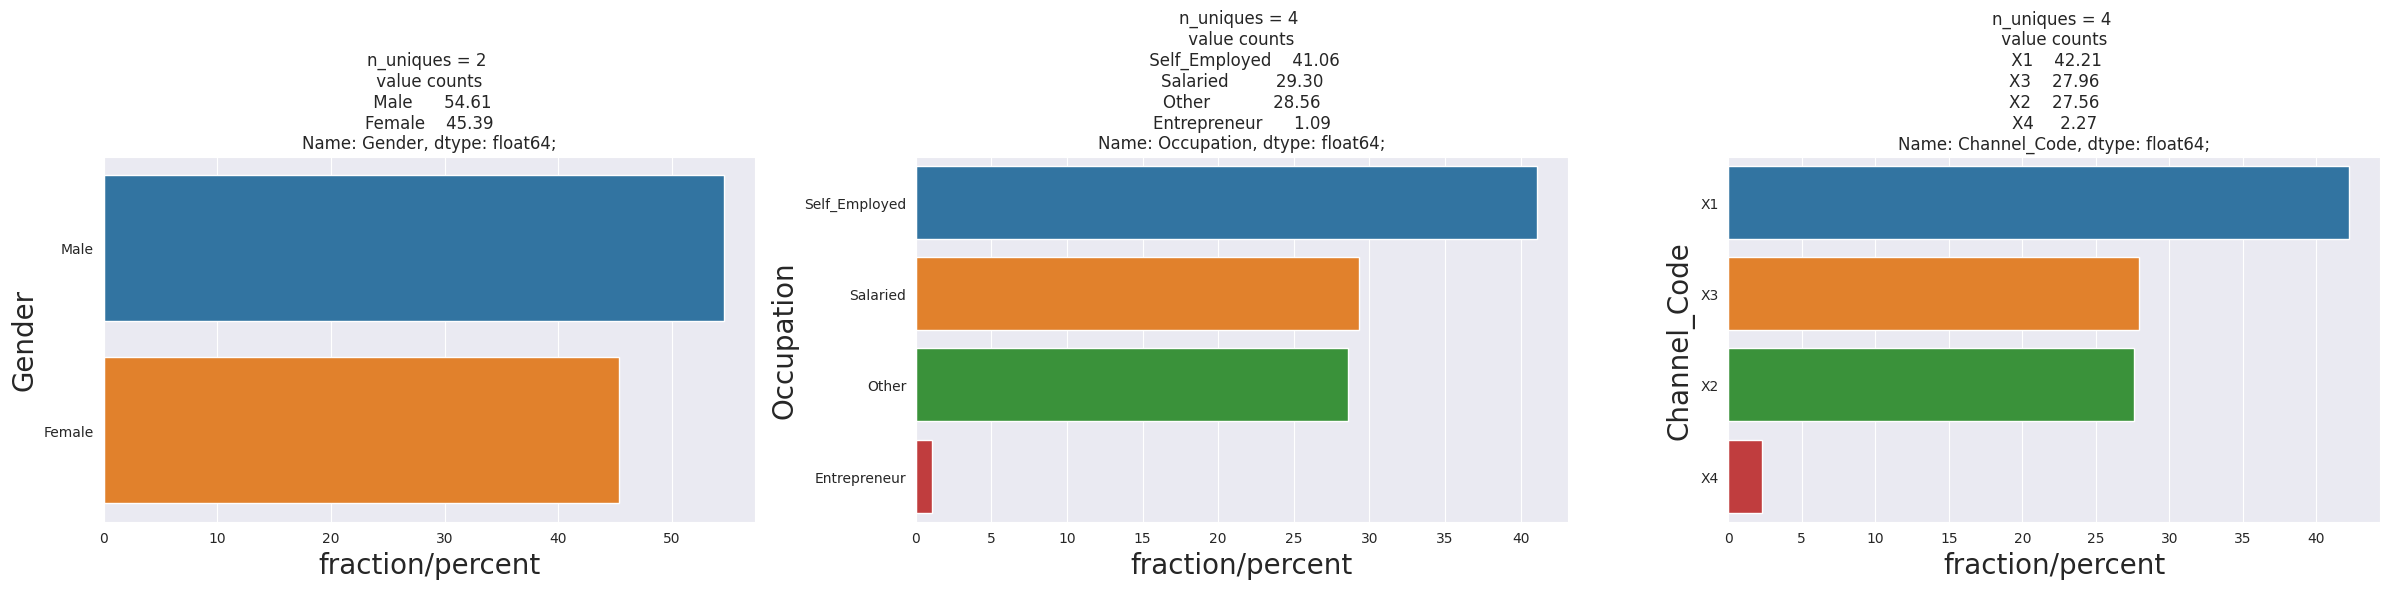

In [ ]:
UVA_category(df, ['Gender', 'Occupation','Channel_Code'])

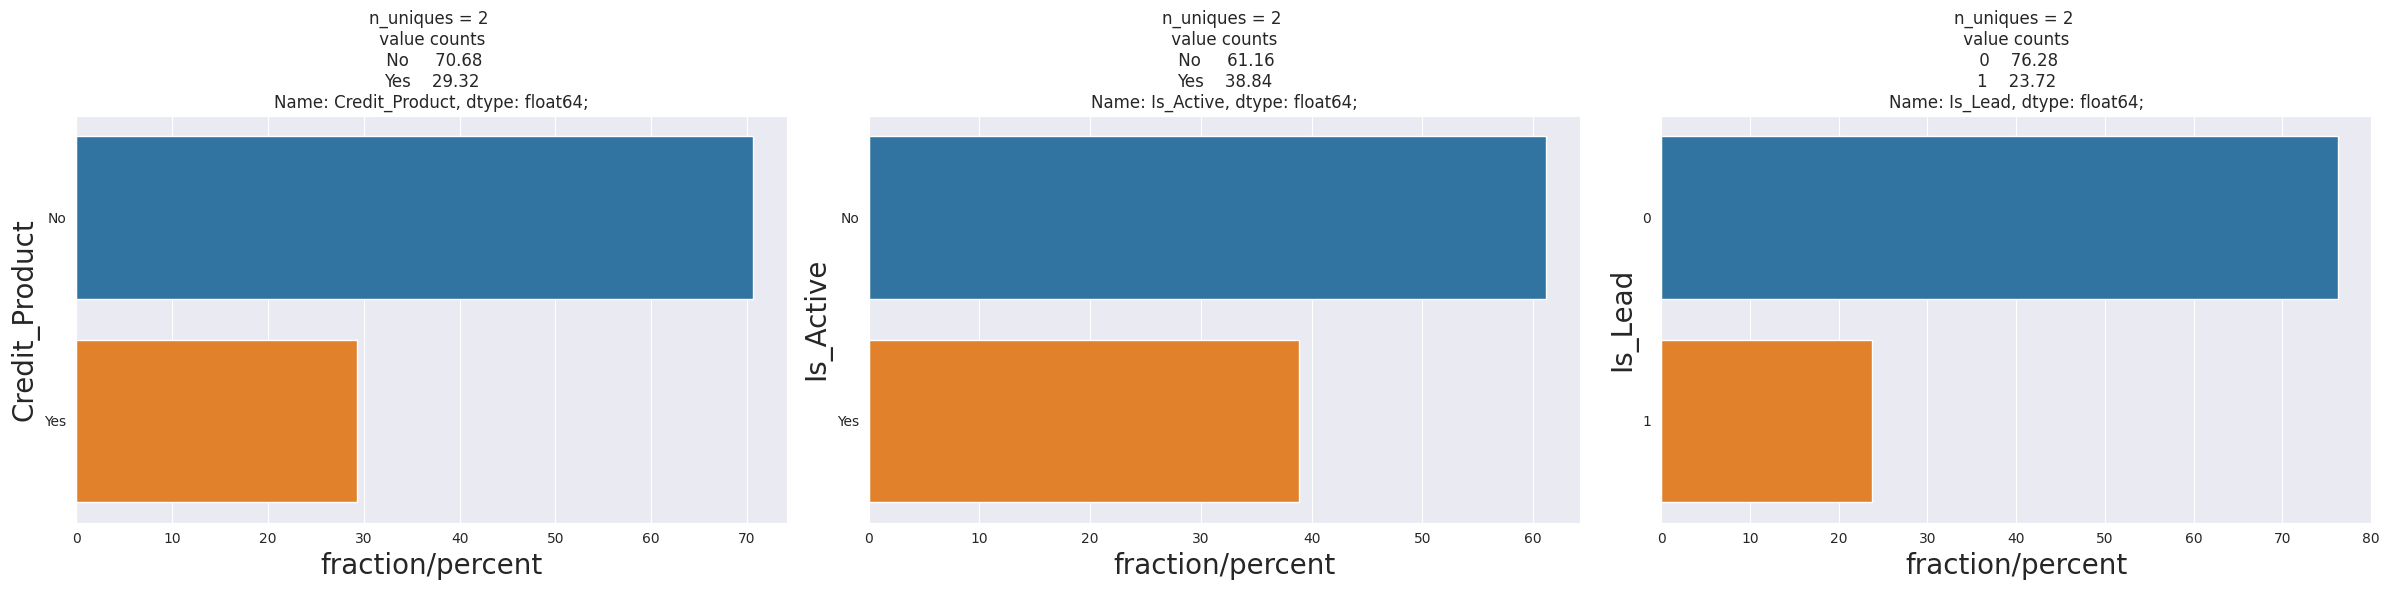

In [ ]:
UVA_category(df, ['Credit_Product', 'Is_Active','Is_Lead'])

###### In order to have a better view of our data, we will categorize some numerical variables so that we can have a view similar to the one we made above

In [ ]:
df['Region_Code'].value_counts()[:]

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [ ]:
df['Region_Code'].value_counts()[:].describe()

count       35.000000
mean      7020.714286
std       8353.414897
min       1497.000000
25%       2257.000000
50%       3976.000000
75%       6867.000000
max      35934.000000
Name: Region_Code, dtype: float64

In [ ]:
df['Region_Code'].value_counts().median()

3976.0

In [ ]:
# getting region codes which have less than 3976  accounts
tmp = df['Region_Code'].value_counts()[:]
regions = tmp[tmp<df['Region_Code'].value_counts().median()].index

In [ ]:
df['Region_range'] = 'str'
df['Region_range'][df['Region_Code'].isin(regions[:])] = 'Low Accounts'
df['Region_range'][~df['Region_Code'].isin(regions[:])] = 'High Accounts'
df['Region_range'] = df['Region_range'].astype('category')

In [ ]:
df['Age_range'] = 'str'
df['Age_range'][(df['Age']<= 40)] = 'Young Adults'
df['Age_range'][(df['Age']>40) & (df['Age']<=60) ] = 'Middle-aged Adults'
df['Age_range'][(df['Age']>60)] = 'Old Adults'
df['Age_range'] = df['Age_range'].astype('category')

In [ ]:
df['Vintage'].describe()

count    245725.000000
mean         46.959141
std          32.353136
min           7.000000
25%          20.000000
50%          32.000000
75%          73.000000
max         135.000000
Name: Vintage, dtype: float64

In [ ]:
df['Vintage_range'] = 'str'
df['Vintage_range'][(df['Vintage']<= 32)] = 'Low Vintage'
df['Vintage_range'][(df['Vintage']>32)] = 'High Vintage'
df['Vintage_range'] = df['Vintage_range'].astype('category')

In [ ]:
df['Avg_Account_Balance'].describe()

count    2.457250e+05
mean     1.128403e+06
std      8.529364e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      1.035201e+07
Name: Avg_Account_Balance, dtype: float64

In [ ]:
df['Avg_Account_Balance_range'] = 'str'
df['Avg_Account_Balance_range'][(df['Avg_Account_Balance']<= 894601)] = 'Low Balance'
df['Avg_Account_Balance_range'][(df['Avg_Account_Balance']>894601)] = 'High Balance'
df['Avg_Account_Balance_range'] = df['Avg_Account_Balance_range'].astype('category')

In [ ]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_range,Age_range,Vintage_range,Avg_Account_Balance_range
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696.0,No,0,High Accounts,Old Adults,High Vintage,High Balance
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988.0,No,0,High Accounts,Young Adults,Low Vintage,Low Balance
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315.0,Yes,0,High Accounts,Middle-aged Adults,Low Vintage,High Balance
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454.0,No,0,High Accounts,Young Adults,Low Vintage,Low Balance
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787.0,No,0,High Accounts,Young Adults,High Vintage,Low Balance


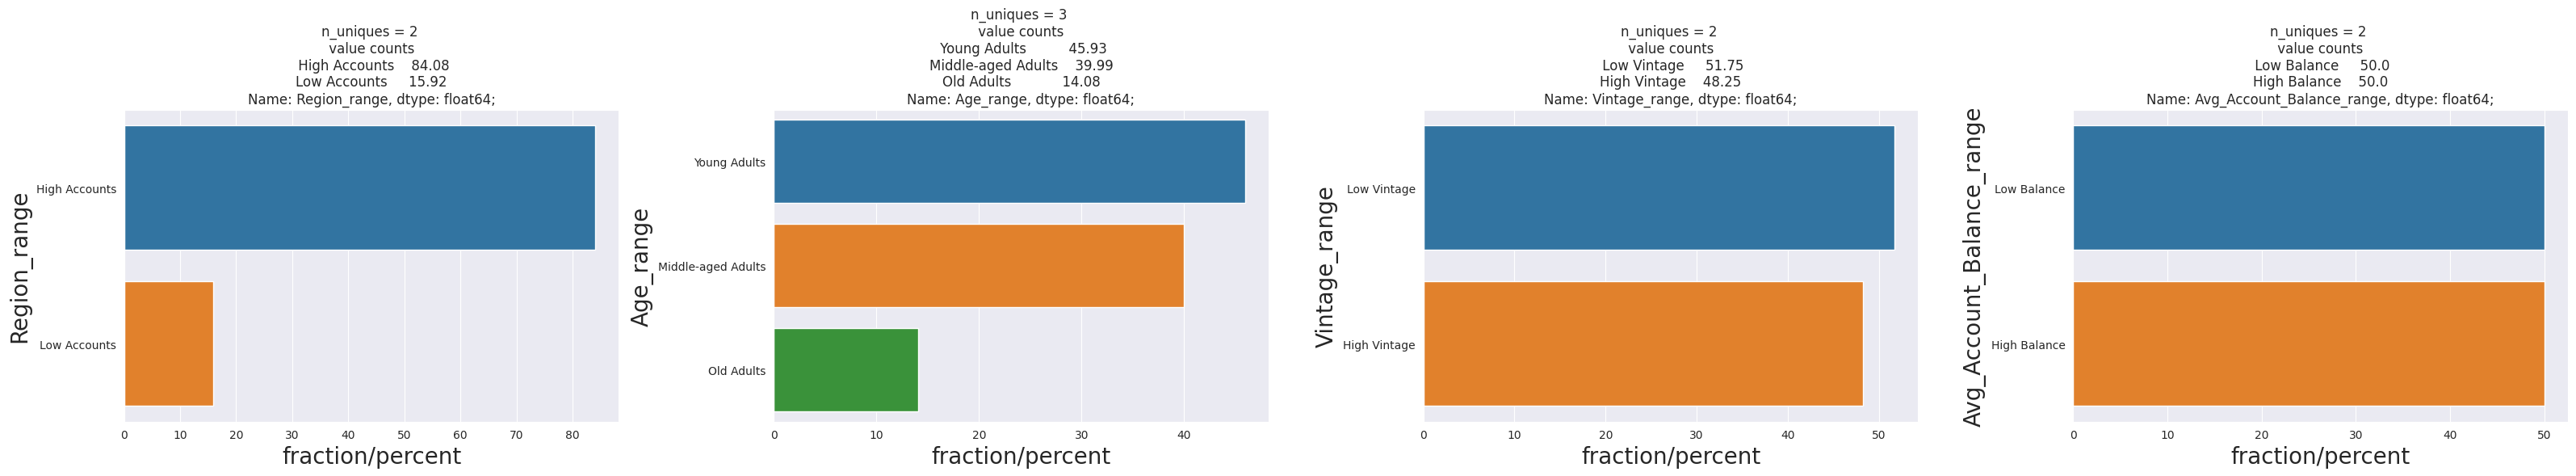

In [ ]:
UVA_category(df, ['Region_range', 'Age_range', 'Vintage_range','Avg_Account_Balance_range'])  

###  BIVARIATE ANALYSIS

#### 1. NUMERICAL - NUMERICAL

In [ ]:
numerical = df.select_dtypes(include=['int64','float64'])[:]
numerical.dtypes

Age                      int64
Vintage                  int64
Avg_Account_Balance    float64
dtype: object

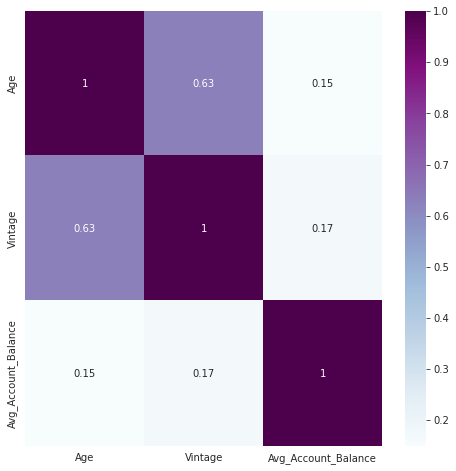

In [ ]:
rounded = round(df.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

In [ ]:
similar = ['Age','Vintage']

[]

<Figure size 840x560 with 0 Axes>

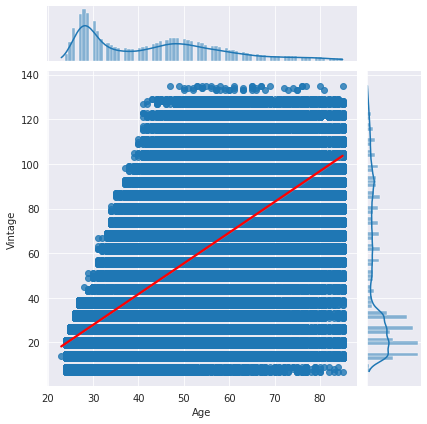

In [ ]:
plt.figure(dpi=140)
sns.jointplot('Age','Vintage', data= numerical[similar], kind='reg',line_kws={"color":"red"} )
plt.plot()

#### 2.NUMERICAL - CATEGORICAL

In [ ]:
numerical.dtypes

Age                      int64
Vintage                  int64
Avg_Account_Balance    float64
dtype: object

In [ ]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

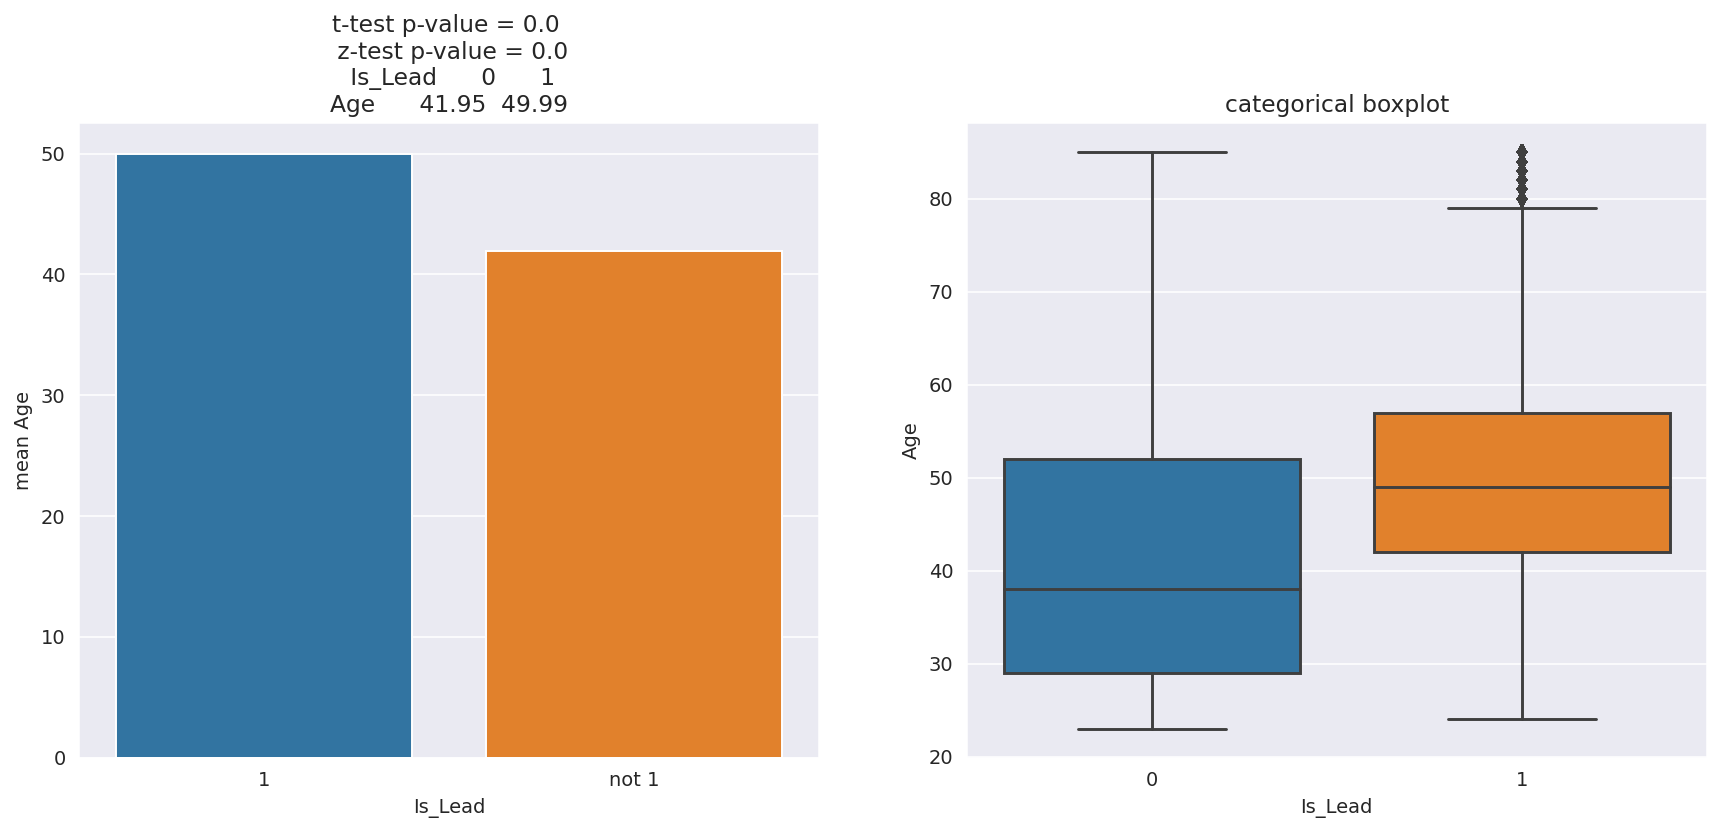

In [ ]:
Bivariate_cont_cat(df, 'Age', 'Is_Lead', 1)

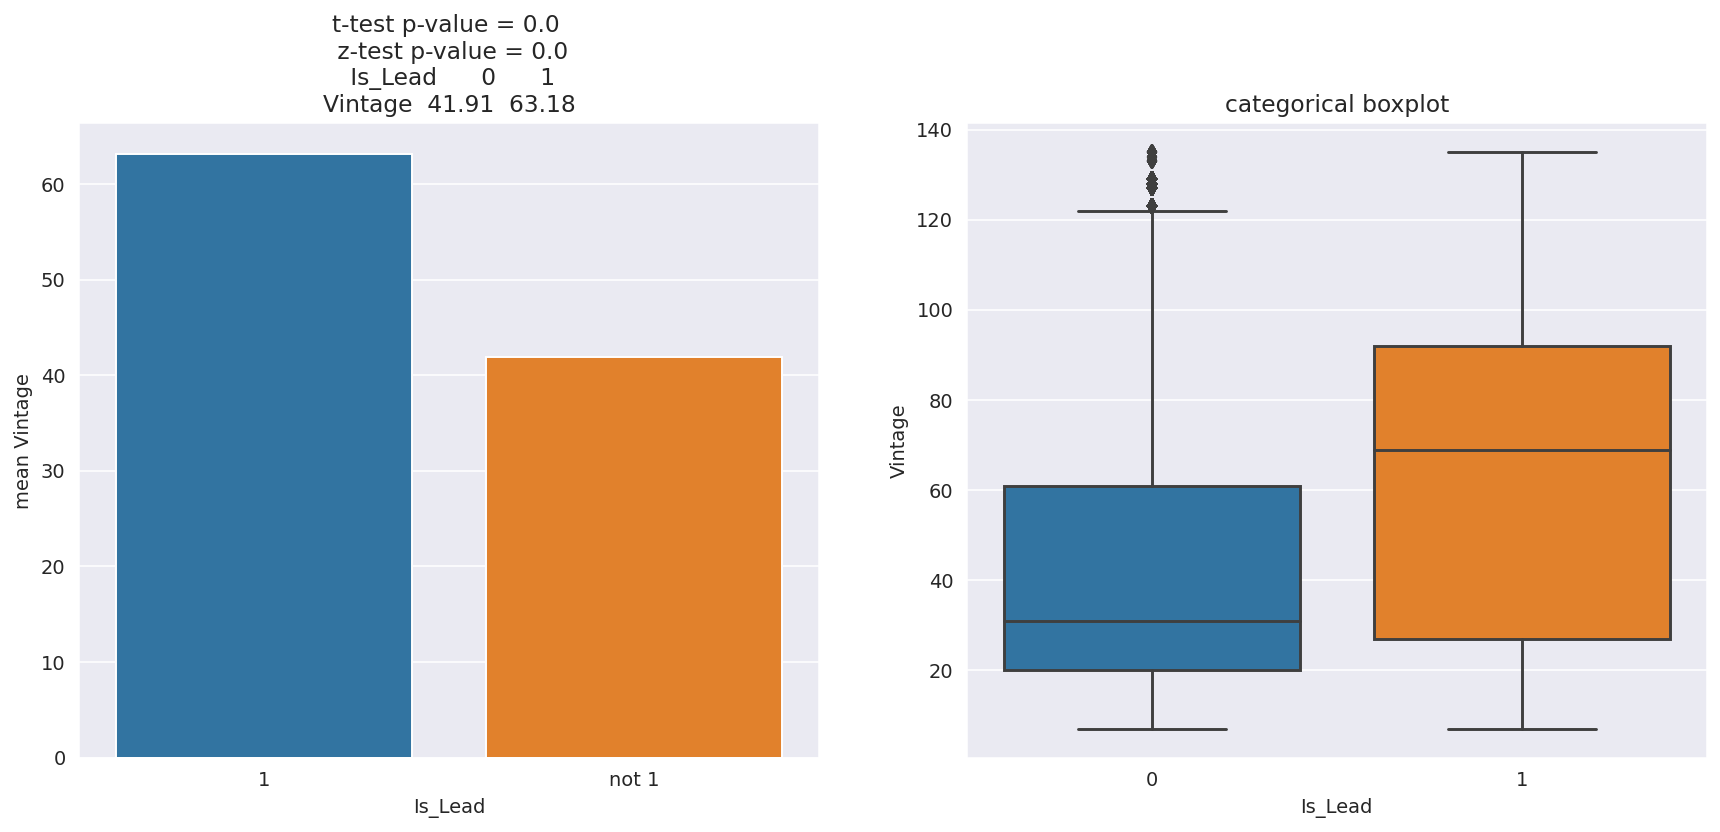

In [ ]:
Bivariate_cont_cat(df, 'Vintage', 'Is_Lead', 1)

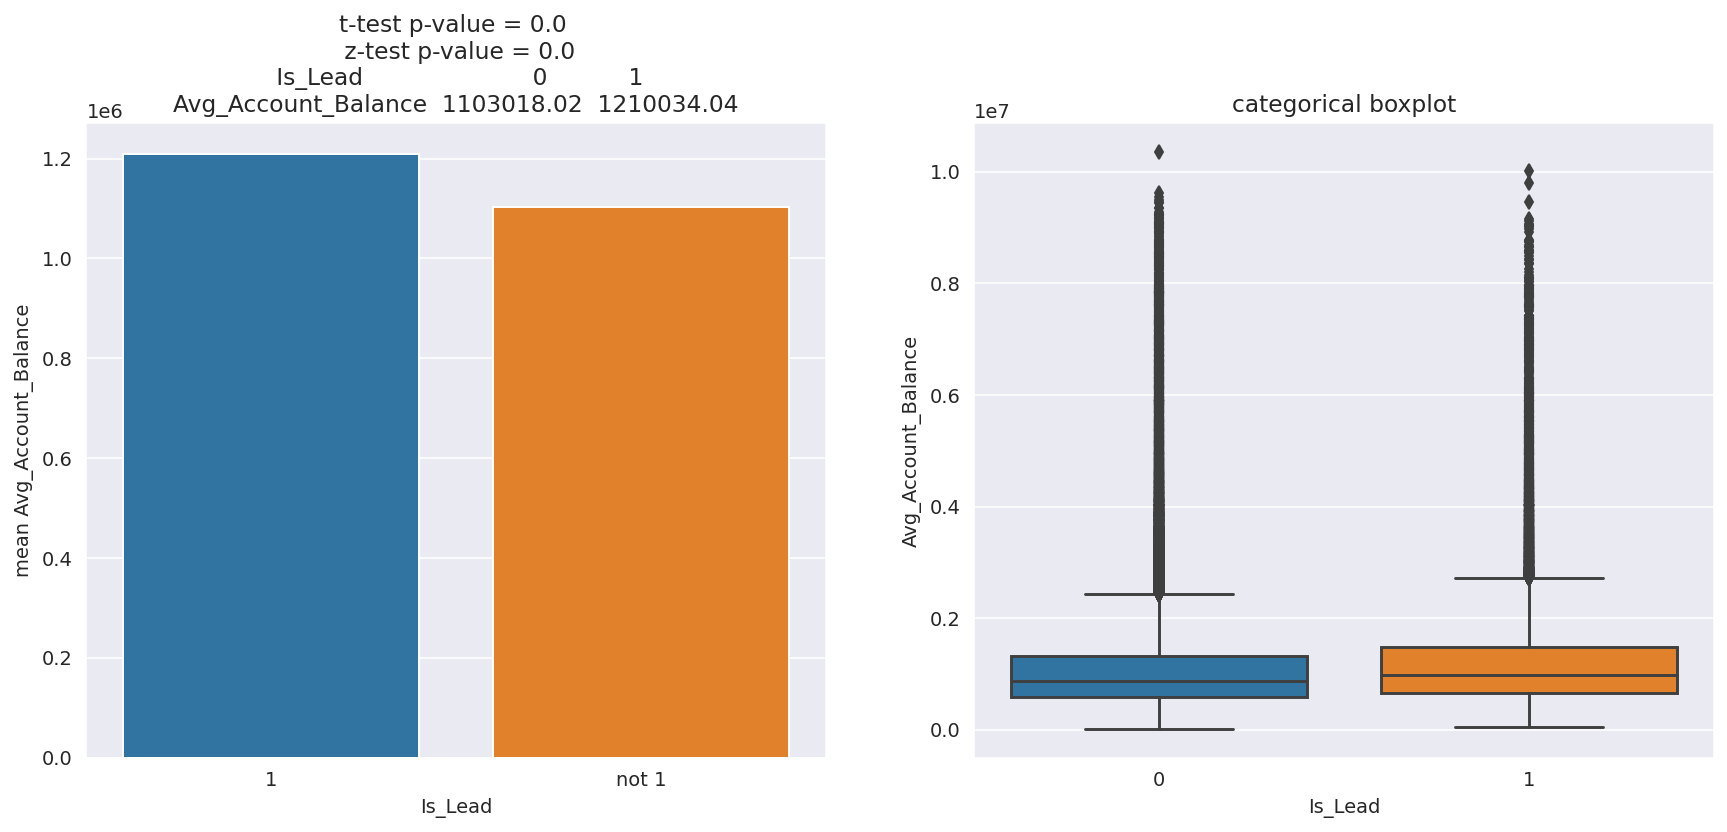

In [ ]:
Bivariate_cont_cat(df, 'Avg_Account_Balance', 'Is_Lead', 1)

#### 3.CATEGORICAL - CATEGORICAL

In [ ]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

In [ ]:
df.select_dtypes(include=['category']).dtypes

Gender                       category
Region_Code                  category
Occupation                   category
Channel_Code                 category
Credit_Product               category
Is_Active                    category
Is_Lead                      category
Region_range                 category
Age_range                    category
Vintage_range                category
Avg_Account_Balance_range    category
dtype: object

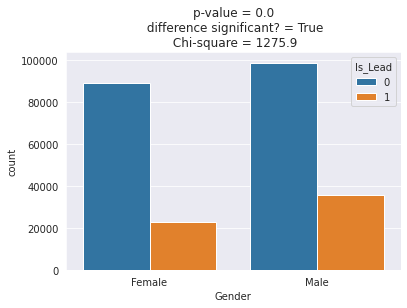

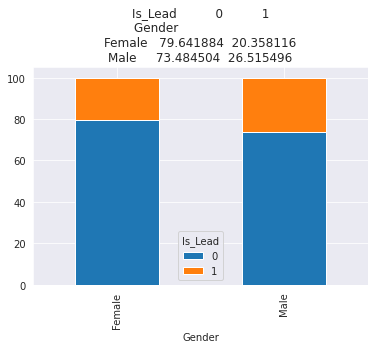

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Gender')

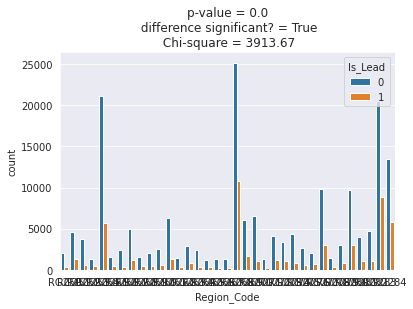

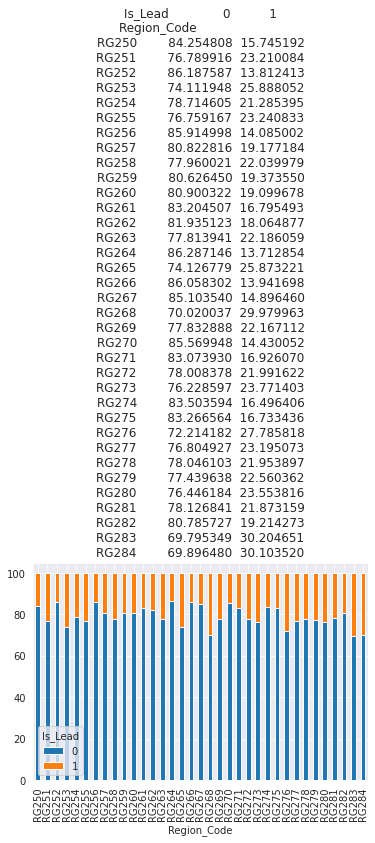

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Region_Code')

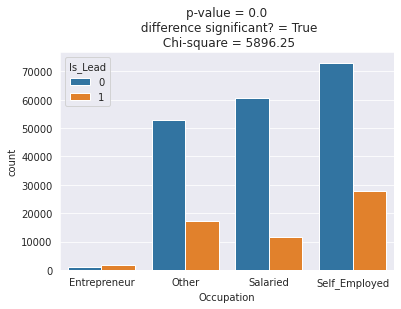

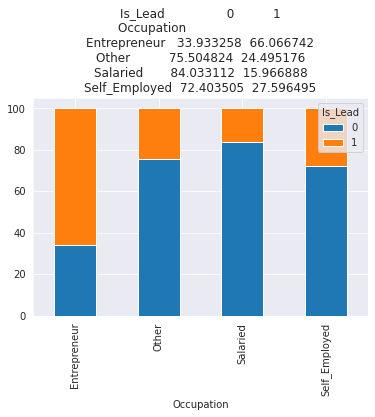

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Occupation')

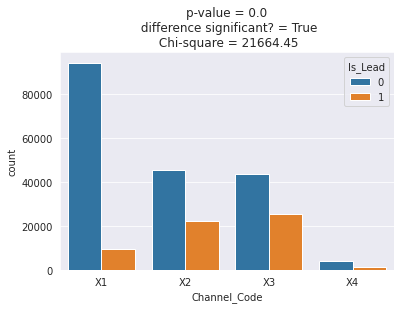

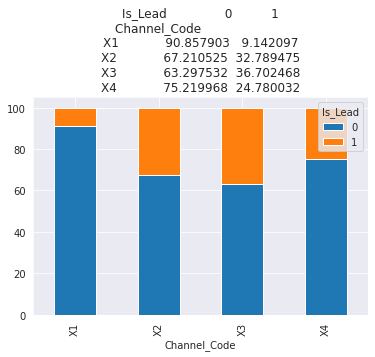

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Channel_Code')

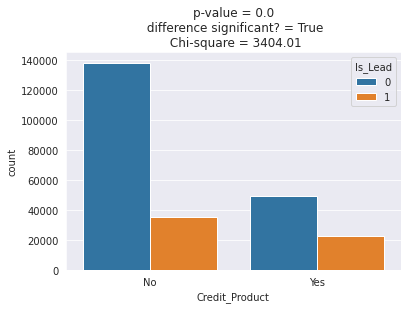

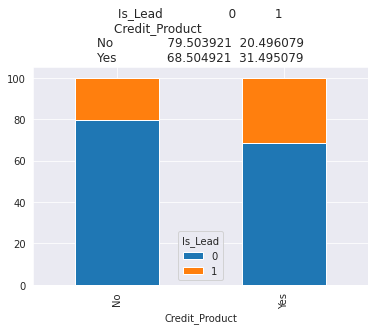

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Credit_Product')

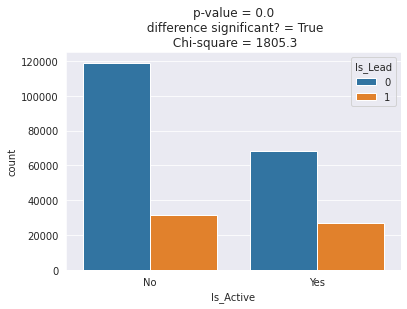

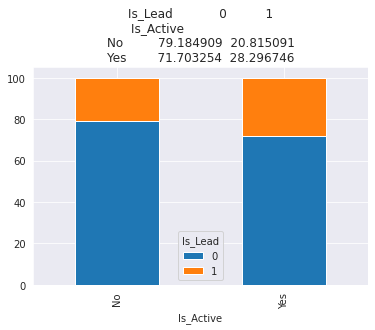

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Is_Active')

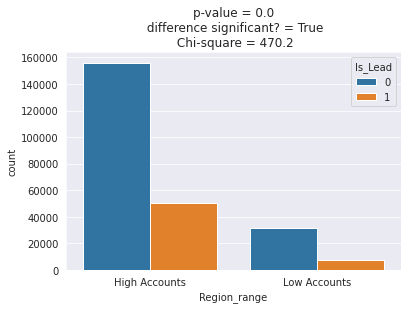

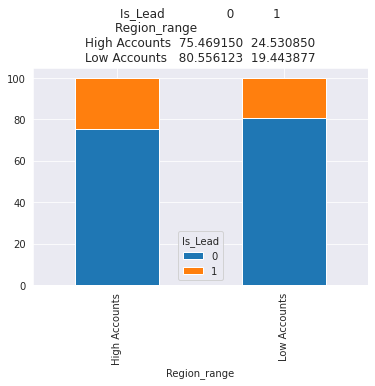

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Region_range')

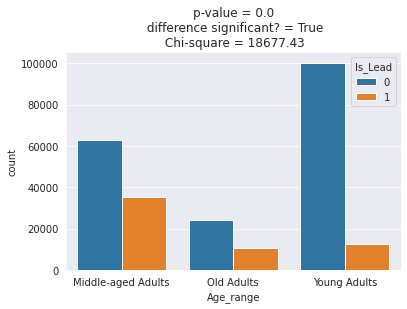

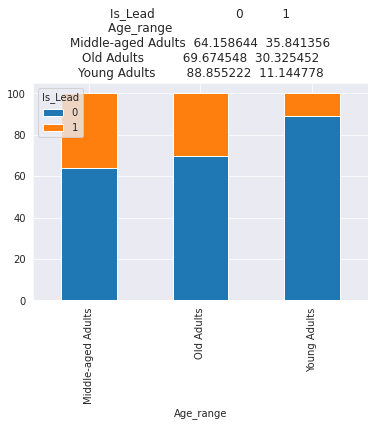

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Age_range')

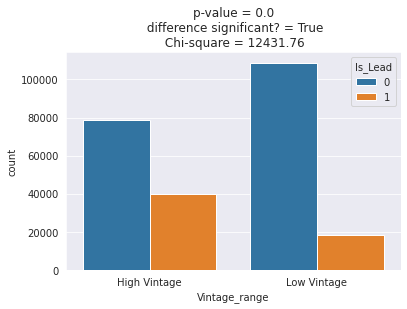

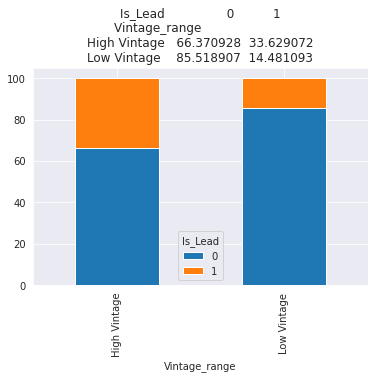

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Vintage_range')

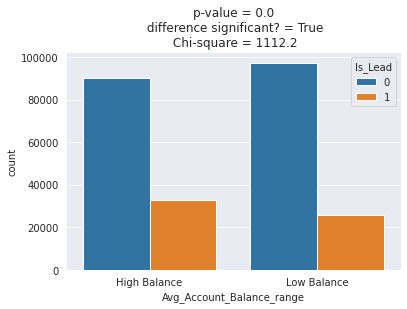

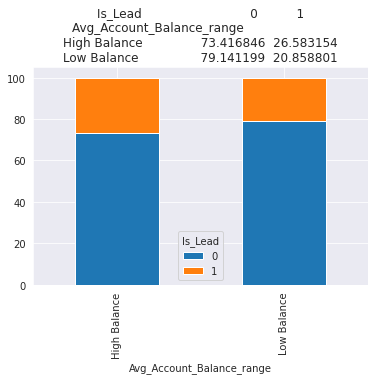

In [ ]:
BVA_categorical_plot(df, 'Is_Lead', 'Avg_Account_Balance_range')

###  MULTIVARIATE ANALYSIS

We will use Pivot table to comply with the objective of identifying the factors associated with customer interested using multiple categorical features.

In [ ]:
df['Target_variable'] = df['Is_Lead'].astype('int64')

In [ ]:
df['Target_variable_2'] = 0
df['Target_variable_2'][(df['Target_variable']== 1)] = 0
df['Target_variable_2'][(df['Target_variable']!= 1)] = 1

In [ ]:
df.head(7)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_range,Age_range,Vintage_range,Avg_Account_Balance_range,Target_variable,Target_variable_2
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696.0,No,0,High Accounts,Old Adults,High Vintage,High Balance,0,1
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988.0,No,0,High Accounts,Young Adults,Low Vintage,Low Balance,0,1
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315.0,Yes,0,High Accounts,Middle-aged Adults,Low Vintage,High Balance,0,1
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454.0,No,0,High Accounts,Young Adults,Low Vintage,Low Balance,0,1
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787.0,No,0,High Accounts,Young Adults,High Vintage,Low Balance,0,1
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163.0,Yes,0,High Accounts,Middle-aged Adults,Low Vintage,Low Balance,0,1
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,No,1056750.0,Yes,1,High Accounts,Old Adults,Low Vintage,High Balance,1,0


In [ ]:
df.dtypes

ID                             object
Gender                       category
Age                             int64
Region_Code                  category
Occupation                   category
Channel_Code                 category
Vintage                         int64
Credit_Product               category
Avg_Account_Balance           float64
Is_Active                    category
Is_Lead                      category
Region_range                 category
Age_range                    category
Vintage_range                category
Avg_Account_Balance_range    category
Target_variable                 int64
Target_variable_2               int64
dtype: object

#### 1.Gender, Age_range, Avg_Account_Balance_range

In [ ]:
df.pivot_table('Target_variable', ['Gender', 'Age_range'], 'Avg_Account_Balance_range', aggfunc='sum')

Avg_Account_Balance_range  High Balance  Low Balance
Gender Age_range                                    
Female Middle-aged Adults          7804         5297
       Old Adults                  2259         1240
       Young Adults                2635         3470
Male   Middle-aged Adults         12523         9593
       Old Adults                  4527         2466
       Young Adults                2911         3563

In [ ]:
df.pivot_table('Target_variable_2', ['Gender', 'Age_range'], 'Avg_Account_Balance_range', aggfunc='sum')

Avg_Account_Balance_range  High Balance  Low Balance
Gender Age_range                                    
Female Middle-aged Adults         13009        11103
       Old Adults                  5933         3526
       Young Adults               22218        33034
Male   Middle-aged Adults         20189        18740
       Old Adults                  8977         5670
       Young Adults               19871        25167

In [ ]:
GAC = df.pivot_table('Target_variable', ['Gender', 'Age_range'], 'Avg_Account_Balance_range', aggfunc='mean')*100
round(GAC,2)

Avg_Account_Balance_range  High Balance  Low Balance
Gender Age_range                                    
Female Middle-aged Adults         37.50        32.30
       Old Adults                 27.58        26.02
       Young Adults               10.60         9.51
Male   Middle-aged Adults         38.28        33.86
       Old Adults                 33.52        30.31
       Young Adults               12.78        12.40

In [ ]:
GAC = df.pivot_table('Target_variable_2', ['Gender', 'Age_range'], 'Avg_Account_Balance_range', aggfunc='mean')*100
round(GAC,2)

Avg_Account_Balance_range  High Balance  Low Balance
Gender Age_range                                    
Female Middle-aged Adults         62.50        67.70
       Old Adults                 72.42        73.98
       Young Adults               89.40        90.49
Male   Middle-aged Adults         61.72        66.14
       Old Adults                 66.48        69.69
       Young Adults               87.22        87.60

#### 2.Gender, Age_range, Occupation

In [ ]:
df.pivot_table('Target_variable', ['Gender', 'Age_range'], 'Occupation', aggfunc='sum')

Occupation                 Entrepreneur   Other  Salaried  Self_Employed
Gender Age_range                                                        
Female Middle-aged Adults         609.0  2492.0    1281.0         8719.0
       Old Adults                   NaN  3051.0     257.0          191.0
       Young Adults                42.0   797.0    3545.0         1721.0
Male   Middle-aged Adults        1055.0  4112.0    2355.0        14594.0
       Old Adults                   NaN  5910.0     621.0          462.0
       Young Adults                56.0   827.0    3437.0         2154.0

In [ ]:
df.pivot_table('Target_variable_2', ['Gender', 'Age_range'], 'Occupation', aggfunc='sum')

Occupation                 Entrepreneur    Other  Salaried  Self_Employed
Gender Age_range                                                         
Female Middle-aged Adults         307.0   3462.0       5.0        20338.0
       Old Adults                   NaN   8891.0       0.0          568.0
       Young Adults                29.0  11730.0   34408.0         9085.0
Male   Middle-aged Adults         541.0   5889.0      16.0        32483.0
       Old Adults                   NaN  13665.0       0.0          982.0
       Young Adults                28.0   9347.0   26074.0         9589.0

In [ ]:
df.pivot_table('Target_variable', ['Gender', 'Age_range'], 'Occupation', aggfunc='mean')*100

Occupation                 Entrepreneur      Other    Salaried  Self_Employed
Gender Age_range                                                             
Female Middle-aged Adults     66.484716  41.854216   99.611198      30.006539
       Old Adults                   NaN  25.548484  100.000000      25.164690
       Young Adults           59.154930   6.362258    9.340500      15.926337
Male   Middle-aged Adults     66.102757  41.115888   99.325179      31.000276
       Old Adults                   NaN  30.191571  100.000000      31.994460
       Young Adults           66.666667   8.128563   11.646505      18.342843

In [ ]:
df.pivot_table('Target_variable_2', ['Gender', 'Age_range'], 'Occupation', aggfunc='mean')*100

Occupation                 Entrepreneur      Other   Salaried  Self_Employed
Gender Age_range                                                            
Female Middle-aged Adults     33.515284  58.145784   0.388802      69.993461
       Old Adults                   NaN  74.451516   0.000000      74.835310
       Young Adults           40.845070  93.637742  90.659500      84.073663
Male   Middle-aged Adults     33.897243  58.884112   0.674821      68.999724
       Old Adults                   NaN  69.808429   0.000000      68.005540
       Young Adults           33.333333  91.871437  88.353495      81.657157

#### 3.Gender, Avg_Account_Balance_range,  Occupation

In [ ]:
df.pivot_table('Target_variable', ['Gender', 'Avg_Account_Balance_range'], 'Occupation', aggfunc='sum')

Occupation                        Entrepreneur  Other  Salaried  Self_Employed
Gender Avg_Account_Balance_range                                              
Female High Balance                        460   3772      2497           5969
       Low Balance                         191   2568      2586           4662
Male   High Balance                        750   6619      3443           9149
       Low Balance                         361   4230      2970           8061

In [ ]:
df.pivot_table('Target_variable_2', ['Gender', 'Avg_Account_Balance_range'], 'Occupation', aggfunc='sum')

Occupation                        Entrepreneur  Other  Salaried  Self_Employed
Gender Avg_Account_Balance_range                                              
Female High Balance                        243  12158     13785          14974
       Low Balance                          93  11925     20628          15017
Male   High Balance                        375  15679     11589          21394
       Low Balance                         194  13222     14501          21660

In [ ]:
GEA = df.pivot_table('Target_variable', ['Gender', 'Avg_Account_Balance_range'], 'Occupation', aggfunc='mean')*100
round(GEA,2)

Occupation                        Entrepreneur  Other  Salaried  Self_Employed
Gender Avg_Account_Balance_range                                              
Female High Balance                      65.43  23.68     15.34          28.50
       Low Balance                       67.25  17.72     11.14          23.69
Male   High Balance                      66.67  29.68     22.90          29.95
       Low Balance                       65.05  24.24     17.00          27.12

In [ ]:
GEA = df.pivot_table('Target_variable_2', ['Gender', 'Avg_Account_Balance_range'], 'Occupation', aggfunc='mean')*100
round(GEA,2)

Occupation                        Entrepreneur  Other  Salaried  Self_Employed
Gender Avg_Account_Balance_range                                              
Female High Balance                      34.57  76.32     84.66          71.50
       Low Balance                       32.75  82.28     88.86          76.31
Male   High Balance                      33.33  70.32     77.10          70.05
       Low Balance                       34.95  75.76     83.00          72.88

#### 4.Gender, Avg_Account_Balance_range, Occupation, Age_range

In [ ]:
df.pivot_table('Target_variable', ['Gender', 'Avg_Account_Balance_range'], ['Occupation', 'Age_range'], aggfunc='sum')

Occupation                             Entrepreneur  ... Self_Employed
Age_range                        Middle-aged Adults  ...  Young Adults
Gender Avg_Account_Balance_range                     ...              
Female High Balance                             432  ...           763
       Low Balance                              177  ...           958
Male   High Balance                             721  ...           930
       Low Balance                              334  ...          1224

[4 rows x 11 columns]

In [ ]:
df.pivot_table('Target_variable_2', ['Gender', 'Avg_Account_Balance_range'], ['Occupation', 'Age_range'], aggfunc='sum')

Occupation                             Entrepreneur  ... Self_Employed
Age_range                        Middle-aged Adults  ...  Young Adults
Gender Avg_Account_Balance_range                     ...              
Female High Balance                             222  ...          3713
       Low Balance                               85  ...          5372
Male   High Balance                             357  ...          4158
       Low Balance                              184  ...          5431

[4 rows x 11 columns]

In [ ]:
GECA = df.pivot_table('Target_variable', ['Gender', 'Avg_Account_Balance_range'], ['Occupation', 'Age_range'], aggfunc='mean')*100
round(GECA,2)

Occupation                             Entrepreneur  ... Self_Employed
Age_range                        Middle-aged Adults  ...  Young Adults
Gender Avg_Account_Balance_range                     ...              
Female High Balance                           66.06  ...         17.05
       Low Balance                            67.56  ...         15.13
Male   High Balance                           66.88  ...         18.28
       Low Balance                            64.48  ...         18.39

[4 rows x 11 columns]

In [ ]:
GECA = df.pivot_table('Target_variable_2', ['Gender', 'Avg_Account_Balance_range'], ['Occupation', 'Age_range'], aggfunc='mean')*100
round(GECA,2)

Occupation                             Entrepreneur  ... Self_Employed
Age_range                        Middle-aged Adults  ...  Young Adults
Gender Avg_Account_Balance_range                     ...              
Female High Balance                           33.94  ...         82.95
       Low Balance                            32.44  ...         84.87
Male   High Balance                           33.12  ...         81.72
       Low Balance                            35.52  ...         81.61

[4 rows x 11 columns]

### **Recommendation**


* Old Adults whose occupation is Salaried are most likely to buy a credit card.
* Middle-aged Adults whose occupation is Salaried are most likely to buy a credit card.
* Customers whose occupation is Entrepreneur are most likely to buy a credit card.
* Young Adults whose occupation is  not Entrepreneur are least likely to buy a credit card.
* Do more research and find out why young adult customers (<=40 years) are not interested in buying credit card and why Entrepreneurs are interest in buying credit card and accordingly create a strategy.